<a href="https://colab.research.google.com/github/Rashigarashi/fundamental-of-machine-learning/blob/main/multilayer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

multilayer perceptron

First 5 rows of dataset:
    variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

MLP with activation = relu

Confusion Matrix:
[[151   2]
 [  0 122]]
TN=151, FP=2, FN=0, TP=122

Performance Metrics:
Accuracy  : 0.9927
Precision : 0.9839
Recall    : 1.0000
F1-score  : 0.9919

Detailed Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       153
           1       0.98      1.00      0.99       122

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



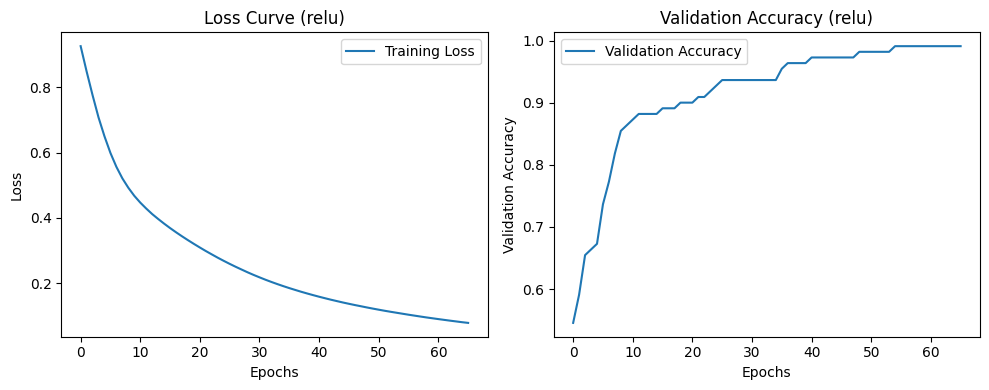


MLP with activation = tanh

Confusion Matrix:
[[153   0]
 [  4 118]]
TN=153, FP=0, FN=4, TP=118

Performance Metrics:
Accuracy  : 0.9855
Precision : 1.0000
Recall    : 0.9672
F1-score  : 0.9833

Detailed Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       153
           1       1.00      0.97      0.98       122

    accuracy                           0.99       275
   macro avg       0.99      0.98      0.99       275
weighted avg       0.99      0.99      0.99       275



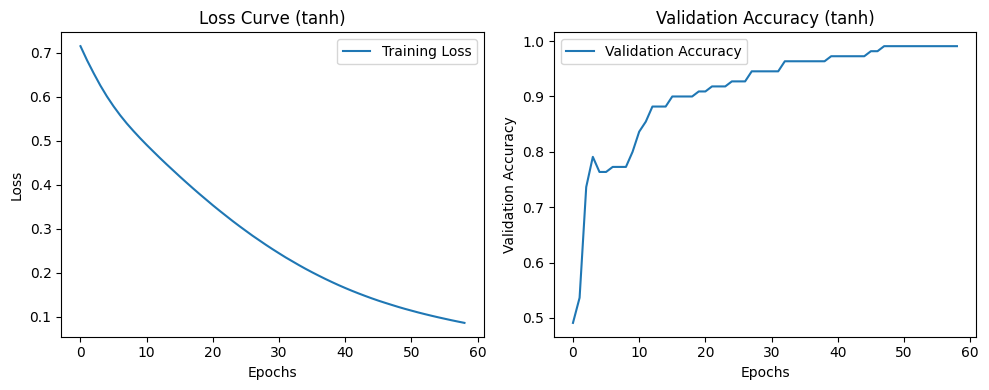


MLP with activation = logistic

Confusion Matrix:
[[153   0]
 [122   0]]
TN=153, FP=0, FN=122, TP=0

Performance Metrics:
Accuracy  : 0.5564
Precision : 0.0000
Recall    : 0.0000
F1-score  : 0.0000

Detailed Report:
               precision    recall  f1-score   support

           0       0.56      1.00      0.71       153
           1       0.00      0.00      0.00       122

    accuracy                           0.56       275
   macro avg       0.28      0.50      0.36       275
weighted avg       0.31      0.56      0.40       275



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

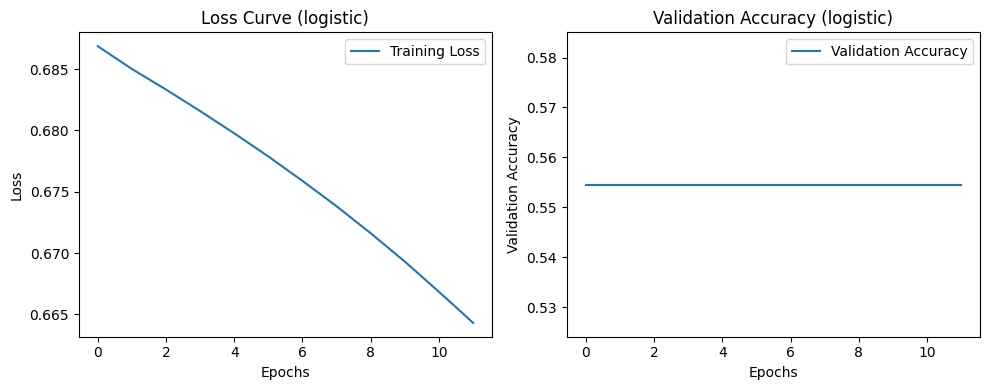


MLP with activation = identity

Confusion Matrix:
[[149   4]
 [  3 119]]
TN=149, FP=4, FN=3, TP=119

Performance Metrics:
Accuracy  : 0.9745
Precision : 0.9675
Recall    : 0.9754
F1-score  : 0.9714

Detailed Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       153
           1       0.97      0.98      0.97       122

    accuracy                           0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



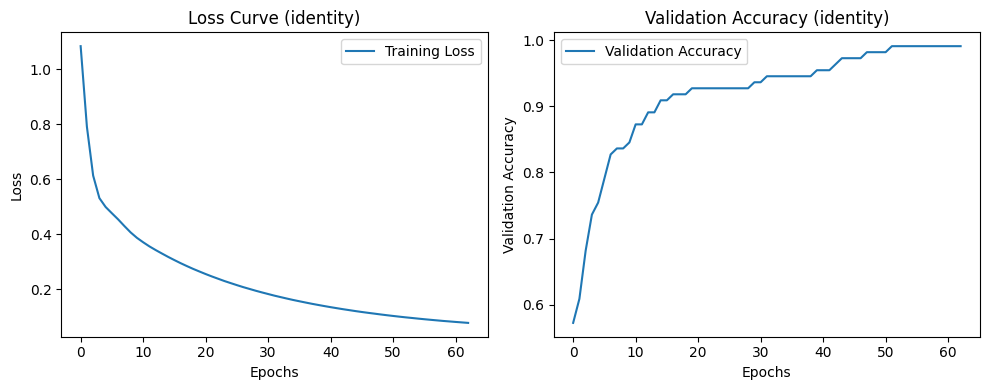

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)


df = pd.read_csv("BankNoteAuthentication.csv")
print("First 5 rows of dataset:\n", df.head())

X = df.drop("class", axis=1)
y = df["class"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

def run_mlp(activation_fn):
    print("\n==============================")
    print(f"MLP with activation = {activation_fn}")
    print("==============================")


    mlp = MLPClassifier(
        hidden_layer_sizes=(10, 10),
        solver="adam",
        activation=activation_fn,
        max_iter=500,
        early_stopping=True,
        validation_fraction=0.1,
        random_state=42
    )


    mlp.fit(X_train, y_train)


    y_pred = mlp.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    print("\nConfusion Matrix:")
    print(cm)
    print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("\nPerformance Metrics:")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1-score  : {f1:.4f}")
    print("\nDetailed Report:\n", classification_report(y_test, y_pred))

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(mlp.loss_curve_, label="Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Loss Curve ({activation_fn})")
    plt.legend()

    if hasattr(mlp, "validation_scores_"):
        plt.subplot(1, 2, 2)
        plt.plot(mlp.validation_scores_, label="Validation Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Validation Accuracy")
        plt.title(f"Validation Accuracy ({activation_fn})")
        plt.legend()

    plt.tight_layout()
    plt.show()


for act in ["relu", "tanh", "logistic", "identity"]:
    run_mlp(act)